In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm # Colormap for time
import numpy as np
from datetime import datetime
import os



#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot


In [52]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Rothmund_Pressure_release"

#Location = r"C:\\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\GitHub\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Membrane_valve_leak_test"
Foldernames = ["/Data/v2"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 2
Loading... Folder 1 of 1, Sample 2 of 2


In [53]:
data[1]

{'Samplerate': [1, 1],
 'Samplename': ['DS30_h0_r9', 'DS30_h0_r9'],
 'Offset': [{'presFesto-1': 4.997222222222223,
   'DigOut-1': 4.896111111111111,
   'AWM5-5': 1.0165555555555554,
   'SSCDP05-3': 2.5145555555555554},
  {'presFesto-1': 4.997888888888889,
   'DigOut-1': -0.05588888888888889,
   'AWM5-5': 1.0136666666666665,
   'SSCDP05-3': 2.527111111111111}]}

In [54]:
len(data[0])

2

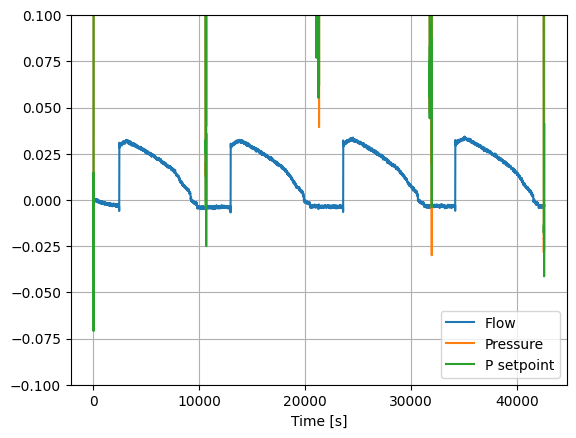

In [55]:
k =0
for i, df in [0,1,2,3,4]:#enumerate(data[0]):
flow = data[0][k]['AWM5-5'].values #SLPM
 # Check which sensor data is available in the DataFrame columns
if 'SSCDP15-3' in df.columns:
    P = df['SSCDP15-3'].values
    #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
elif 'MPX100-3' in df.columns:
    P = df['MPX100-3'].values
    #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
elif 'MPX700-2' in df.columns:
    P = df['MPX700-2'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
elif 'SSCDP05-3' in df.columns:
    P = df['SSCDP05-3'].values
#label = len(df['MPX700-2'].values)/1000#'MPX700-2'
else:
    print(f"Skipping experiment {i+1}: No recognizable sensor data.")
     # Skip this iteration and move to the next experiment

#P = data[0][k]['SSCDP15-3'].values # Pa 
time = data[0][k]['Time']

plt.plot(time,flow, label = 'Flow')
plt.plot(time,P/1000, label = "Pressure")
plt.plot(time,data[0][k]['presFesto-1']*100,label ="P setpoint")
plt.legend()
plt.xlabel('Time [s]')
plt.ylim(-0.1,0.1)
plt.grid()

In [56]:
import matplotlib.pyplot as plt

k = 4
flow = data[0][k]['AWM5-5'].values  # SLPM
P = data[0][k]['SSCDP15-3'].values  # Pa
time = data[0][k]['Time']

fig, ax1 = plt.subplots()

# Plotting Flow and Pressure on the left y-axis
ax1.plot(time, flow, label='Flow')
#ax1.plot(time, P/1000, label='Pressure')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Flow and Pressure')
ax1.legend(loc='upper left')

# Create a second y-axis to plot presFesto
ax2 = ax1.twinx()
#ax2.plot(time, data[0][k]['presFesto-1']*100, 'g-', label='presFesto')
ax2.set_ylabel('presFesto [kPa]')
ax2.legend(loc='upper right')

#plt.xlim(10,20)
plt.show()

IndexError: list index out of range

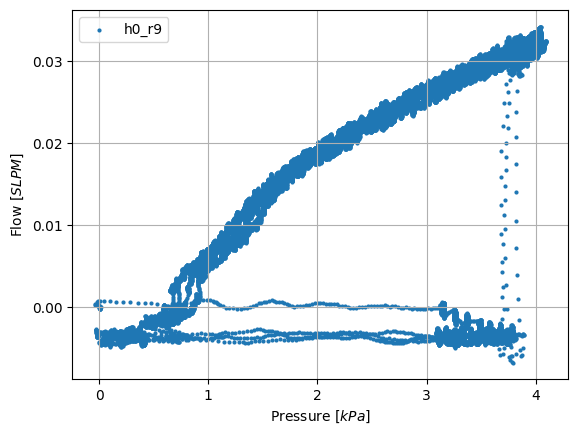

In [ ]:
plt.figure()  # Create a new figure for each experiment
for i, df in enumerate(data[0]):
    
    # Check which sensor data is available in the DataFrame columns
    if 'SSCDP15-3' in df.columns:
        P = df['SSCDP15-3'].values
        #label = len(df['SSCDP15-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX100-3' in df.columns:
        P = df['MPX100-3'].values
        #label = len(df['MPX100-3'].values)/1000 #'SSCDP15-3'
    elif 'MPX700-2' in df.columns:
        P = df['MPX700-2'].values
        #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    elif 'SSCDP05-3' in df.columns:
        P = df['SSCDP05-3'].values
    #label = len(df['MPX700-2'].values)/1000#'MPX700-2'
    else:
        print(f"Skipping experiment {i+1}: No recognizable sensor data.")
        continue  # Skip this iteration and move to the next experiment
        
    # Assuming Time is common in all DataFrames and is in a column named 'Time'
    #Time = df['Time'].values
    flow = data[0][i]['AWM5-5'].values #SLPM

    plt.scatter( P/1000,flow, label=data[1]['Samplename'][i][5:],marker='.', linewidth=0.000001)
    plt.xlabel('Pressure [$kPa$]')
    plt.ylabel('Flow [$SLPM$]')
    plt.legend(loc='upper left')
    #plt.title(f'Experiment {i+1}')
  
#plt.xlim(0,8) 
plt.grid()
#plt.xlim(0,5)
plt.show() 

# Create a colormap
colormap = cm.get_cmap('viridis')

# Normalize the time variable to fit the colormap scale
norm_time = (time - time.min()) / (time.max() - time.min())

# Loop through and plot each segment with corresponding color
for i in range(len(time) - 1):
    plt.scatter(P[i:i+10]/1000, flow[i:i+10], color=colormap(norm_time[i]))

# Add a colorbar to represent the time variable
sm = cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=time.min(), vmax=time.max()))
sm.set_array([])
plt.colorbar(sm, label='Time [s]')

plt.xlabel('Pressure [kPa]')
plt.ylabel('Flow [SLPM]')
plt.title('Pressure vs Flow Colored by Time')
#plt.xlim(5,7)
#plt.ylim(-0.25, 1)


save_plot('Pressure_vs_flow')
